In [1]:
import numpy as np
import pandas as pd
import altair as alt
from altair import datum

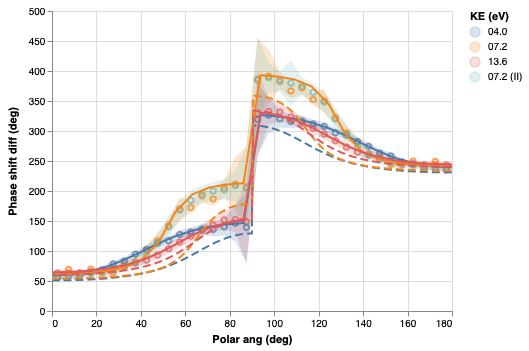

In [2]:
data = pd.read_excel("Data/Ne phase shift diffs.xlsx", sheet_name=None)

key = "Measured"
df = data[key]
df["KE (eV)"] = df["Dataset / KE (eV)"]
df = df[["Polar ang (deg)", "Phase shift diff (deg)", "Phase shift diff fr (deg)", "Phase shift diff to (deg)", "KE (eV)"]]
data[key] = df

key = "Perturb"
df = data[key]
df["KE (eV)"] = df["KE (eV)"].map("{:04.1f}".format)
data[key] = df

key = "TDCASSCF"
df = data[key]
df["KE (eV)"] = df["KE (eV)"].map("{:04.1f}".format)
where = ((df["Group"].isin({"G1430", "G1590", "G1910"}))
         & (df["Config"] == "sum[m]"))
data[key] = df[where]

base = alt.Chart(data["Measured"])
(
    
    base.mark_area(opacity=0.2).encode(
        x="Polar ang (deg)",
        y=alt.Y("Phase shift diff fr (deg)", axis=alt.Axis(title="Phase shift diff (deg)")),
        y2="Phase shift diff to (deg)",
        color="KE (eV)",
    )
    + base.mark_point().encode(
        x="Polar ang (deg)",
        y="Phase shift diff (deg)",
        color="KE (eV)",
    )
    + alt.Chart(data["TDCASSCF"]).mark_line().encode(
        x="Polar ang (deg)",
        y="Phase shift diff (deg)",
        color="KE (eV)",
    )
    + alt.Chart(data["Perturb"]).mark_line(strokeDash=[8, 4]).encode(
        x="Polar ang (deg)",
        y="Phase shift diff (deg)",
        color="KE (eV)",
    )
).interactive(bind_x=False)

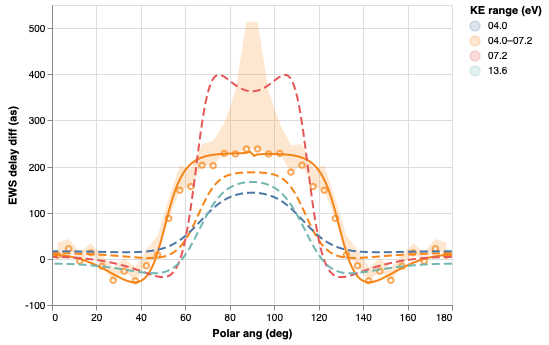

In [8]:
data = pd.read_excel("Data/Ne EWS delay diffs.xlsx", sheet_name=None)

base = alt.Chart(data["Measured"])
(
    base.mark_area(opacity=0.2).encode(
        x="Polar ang (deg)",
        y=alt.Y("EWS delay diff (as)", axis=alt.Axis(title="EWS delay diff (as)")),
        y2="EWS delay diff to (as)",
        color="KE range (eV)",
    )
    + base.mark_point().encode(
        x="Polar ang (deg)",
        y="EWS delay diff (as)",
        color="KE range (eV)",
    )
    + alt.Chart(data["TDCASSCF"]).mark_line().encode(
        x="Polar ang (deg)",
        y="EWS delay diff (as)",
        color="KE range (eV)",
    )
    + alt.Chart(data["Perturb"]).mark_line(strokeDash=[8, 4]).encode(
        x="Polar ang (deg)",
        y="EWS delay diff (as)",
        color="KE range (eV)",
    )
).interactive(bind_x=False)